# Specifying Aerosol

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sasktran as sk

In [2]:
particle_size_dist = sk.ClimatologyUserDefined(altitudes=[0, 100000],
                                               values={'SKCLIMATOLOGY_LOGNORMAL_MODEWIDTH': [1.6, 1.6],
                                                       'SKCLIMATOLOGY_LOGNORMAL_MODERADIUS_MICRONS': [0.08, 0.08]})

In [3]:
aerosol_optprop = sk.MieAerosol(particlesize_climatology=particle_size_dist, species='H2SO4')

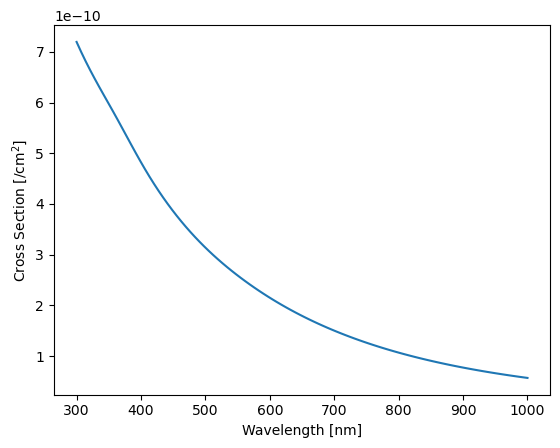

In [4]:
wavel = np.linspace(300, 1000, 100)

aerosol_xs = aerosol_optprop.calculate_cross_sections(sk.MSIS90(),
                                                      latitude=0,
                                                      longitude=0,
                                                      mjd=54372,
                                                      altitude=10000,
                                                      wavelengths=wavel)

plt.plot(aerosol_xs.wavelengths, aerosol_xs.total)
plt.ylabel('Cross Section [/cm$^2$]')
plt.xlabel('Wavelength [nm]');

To include aerosol in a radiative transfer calculation we also need to create a climatology.  To create a user defined aerosol climatology we can do

In [5]:
aerosol_clim = sk.ClimatologyUserDefined(altitudes=[0, 100000],
                                        values={'SKCLIMATOLOGY_AEROSOL_CM3': [1, 1]})

aerosol_species = sk.Species(aerosol_optprop, aerosol_clim)

Which creates a constant values aerosol climatology and the corresponding :py:class:`Species <sasktran.Species>` object.  This object can then be added to SASKTRAN the same way as any other species.